In [1]:
from skimage import io, data
import os
import numpy as np
import skimage
from matplotlib.pyplot import figure, subplot
from scipy import ndimage, signal
from skimage import io, img_as_float, data, filters, img_as_ubyte, util
from matplotlib import pyplot as plt
from skimage.feature import canny
from skimage.filters import median, gaussian, sobel
from skimage.morphology import dilation, erosion, disk
from skimage.filters.edges import convolve
from skimage.transform import rescale, resize
from ipykernel.pylab.backend_inline import flush_figures
from ipywidgets import interact, interactive, fixed
from numpy import array
import warnings
import cv2
import gc
import pylab as pl

In [2]:
class Load:
    def __init__(self):
        return

    @staticmethod
    def img(file):
        img = cv2.imread('C:/Users/jedrz/Desktop/lab4_kck/kck/lab4/res/'+file, cv2.IMREAD_UNCHANGED)
        return img

In [3]:
def to_io(img):
    return (img).astype(np.uint8)

def my_show(img,contours,r,g,b):
    cv2.drawContours(img, contours, -1, (r,g,b), 2)
    io.imshow(to_io(img))

In [4]:
class Filter:
    def __init__(self):
        return

    @staticmethod
    def gray(img):
        gray_img = io.imread(img, as_gray=True)
        #figure(figsize=(20,20))
        #io.imshow(gray_img)
        #plt.show()
        return gray_img

    @staticmethod
    def median(img):
        #median_img = io.imread(img)
        med = median(img, disk(3))
        #io.imshow(med)
        #plt.show()
        return med
        
    @staticmethod
    def gaussian(img):
        gaus_img = io.imread(img)
        gaus = gaussian(gaus_img, sigma=1)
        #io.imshow(gaus)
        #plt.show()
        return gaus

    @staticmethod
    def sobel(img):
        warnings.simplefilter("ignore")
        sob = sobel(img)
        return sob

    @staticmethod
    def canny(img):
        warnings.simplefilter("ignore")
        figure(figsize=(20,20))
        can_img = io.imread(img)
        can = ski.feature.canny(img, sigma=3)
        return can
    @staticmethod
    def dilation(img):
        dilation_img = io.imread(img)
        dil = dilation(dilation_img)
        #io.imshow(dil)
        #plt.show()
        return dil
       
    @staticmethod
    def erosion(img):
        erosion_img = io.imread(img)
        ero = erosion(erosion_img)
        #io.imshow(ero)
        #plt.show()
        return ero

    @staticmethod
    def contur3(img_in):
        warnings.simplefilter("ignore")
        #img = img_as_float(io.imread(img_in)) 
        img = img_as_float(img_in)
        
        Kh = array([[ 1, 2, 1],
                    [ 0, 0, 0],
                    [-1,-2,-1]]) 
        Kh = Kh / 4

        Kv = array([[ 1, 0,-1],
                    [ 2, 0,-2],
                    [ 1, 0,-1]])
        Kv = Kv / 4

        hor = np.abs(convolve(img, Kh))
        ver = np.abs(convolve(img, Kv))
        
        res = np.sqrt(hor**2 + ver**2)
        #res = np.sqrt(hor*0.5 + ver*0.5)
        #res = (hor+ver)/2

        return res
    def thresh(img, t):
        warnings.simplefilter("ignore")
        binary = (img > t) * 255
        binary = np.uint8(binary)
        return binary
    
    def on_change(img, perc=0.5):
        MIN = np.percentile(img, perc)
        MAX = np.percentile(img, 100-perc)
        #Percentyl – kwantyl rzędu k/100, gdzie k=1, … , 99.
        #Intuicyjnie mówiąc, percentyl jest wielkością, poniżej której padają wartości zadanego procentu próbek.

        norm = (img - MIN) / (MAX - MIN)
        norm[norm[:,:] > 1] = 1
        norm[norm[:,:] < 0] = 0
        
        return norm
        #figure(figsize=(15,5))
        #subplot(1,2,1); plt.imshow(norm, cmap='gray')
        #flush_figures()
    @staticmethod    
    def noise(img, noise_prop = 0.0):
        warnings.simplefilter("ignore")
        imgProc = skimage.util.random_noise(img[0], mode='s&p', amount=noise_prop)    
        out = filters.median(imgProc)
        #out = imgProc
        return out
        #axes[0].imshow(out, cmap=plt.cm.gray)
        #getHist(out, axes[1])
        #flush_figures()

    @staticmethod
    def make_contour(img):
        g_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        #edged = cv2.Canny(g_img, 30, 200)
        thresh = 100
        ret, t_img = cv2.threshold(g_img, thresh, 255, cv2.THRESH_BINARY)
        
        contours, hierarchy = cv2.findContours(t_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        img_contours = np.zeros(img.shape)
        return contours, img_contours

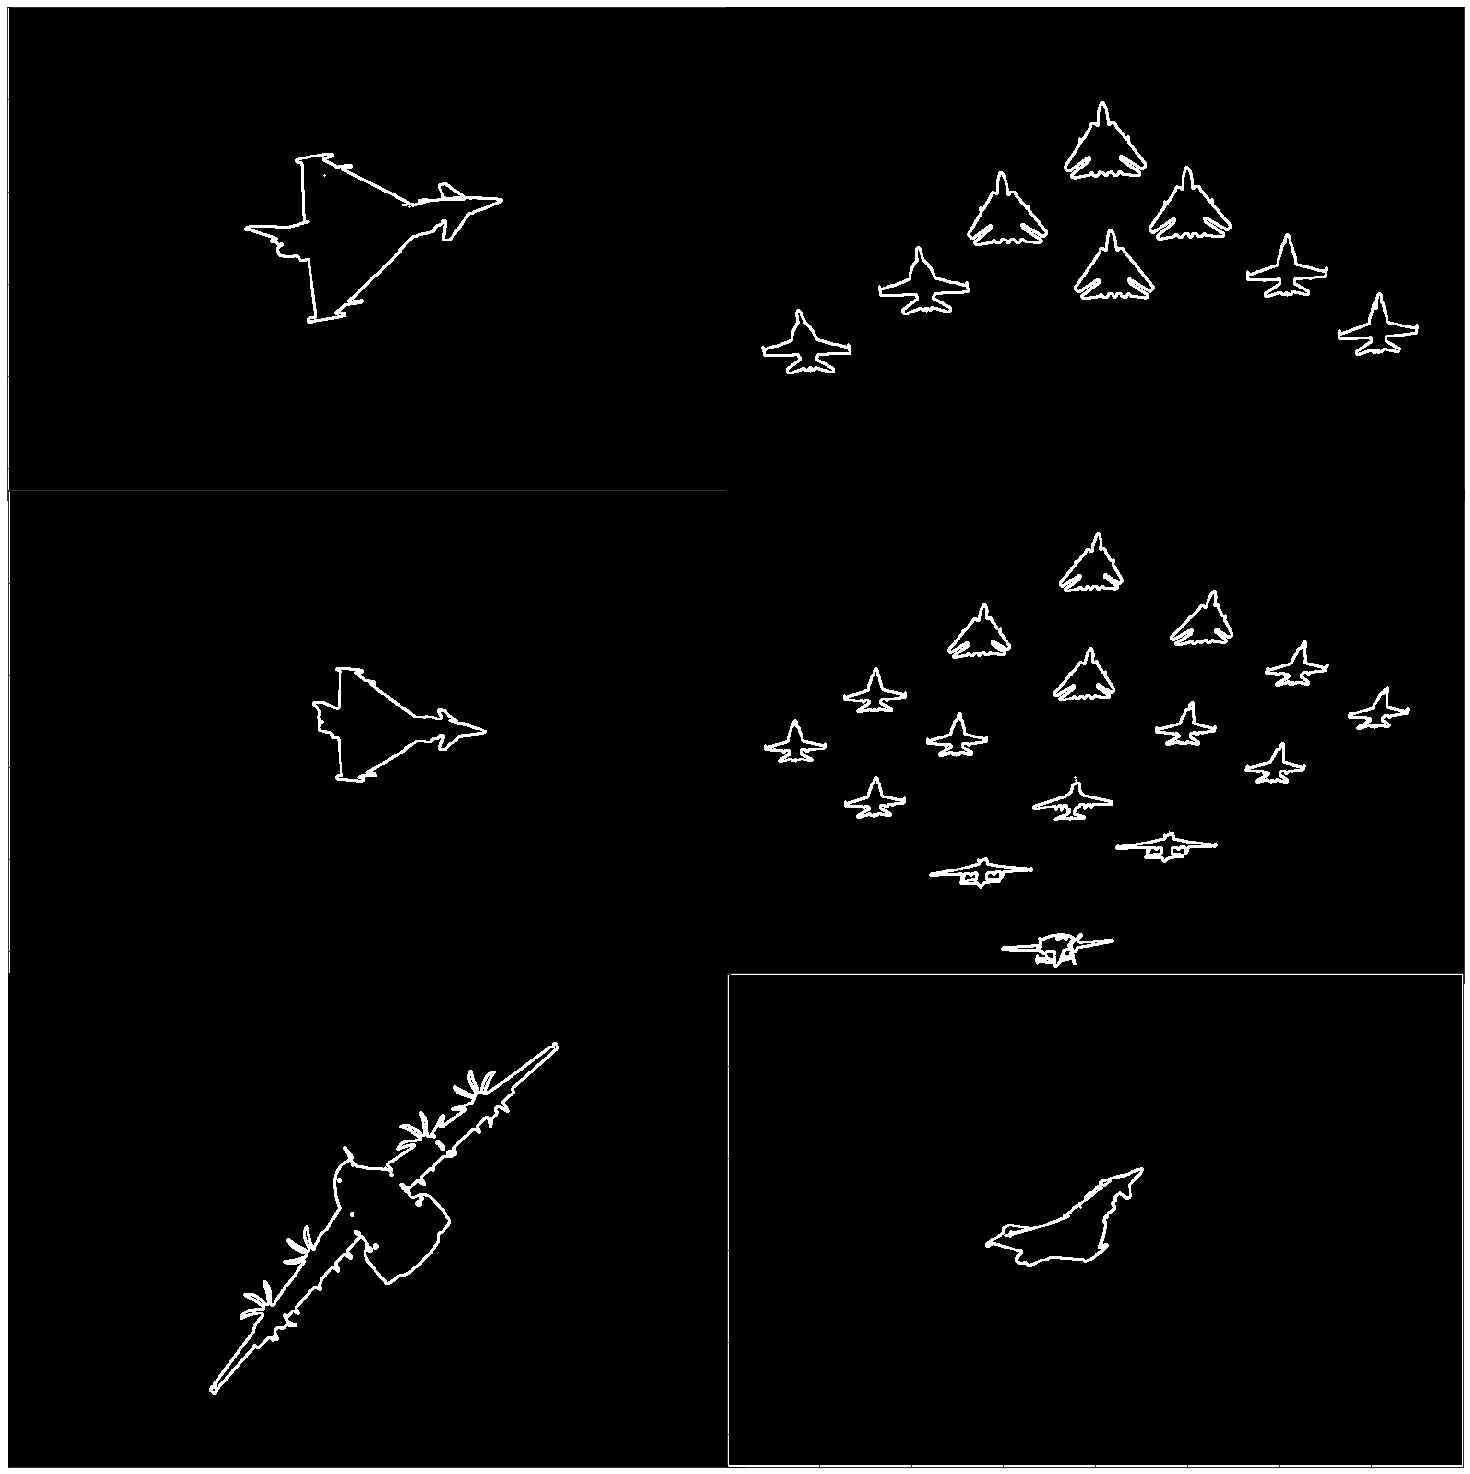

In [5]:
# Jak wczytujemy obrazek od razu do contur3, jego tablica jest 3d, a jak obrobimy go wczesniej jakąś funkcją do filtrowania
# typu gray, to jego tablica jest 2d
def main():
    img1 = 129 - Load.img('samolot10.jpg')#10
    img2 = 255 - Load.img('samolot05.jpg') #01 2100 1500
    img3 = Load.img('samolot08.jpg') #08
    img4 = 255 - Load.img('samolot00.jpg') #00
    img5 = 255 - Load.img('samolot11.jpg') #11
    img6 = 150 - Load.img('samolot09.jpg') #09
    
    
    
    figure(figsize=(20,20))
    
    contours1, img_contours1 = Filter.make_contour(img1)
    contours2, img_contours2 = Filter.make_contour(img2)
    contours3, img_contours3 = Filter.make_contour(img3)
    contours4, img_contours4 = Filter.make_contour(img4)
    contours5, img_contours5 = Filter.make_contour(img5)
    contours6, img_contours6 = Filter.make_contour(img6)
    
    #img_contours1 = resize(img_contours1, (img_contours1.shape[0], img_contours1.shape[1]), anti_aliasing=True)
    #img_contours2 = resize(img_contours2, (img_contours2.shape[0], img_contours2.shape[1]), anti_aliasing=True)
    #img_contours3 = resize(img_contours3, (img_contours3.shape[0], img_contours3.shape[1]), anti_aliasing=True)
    #img_contours4 = resize(img_contours4, (img_contours4.shape[0], img_contours4.shape[1]), anti_aliasing=True)
    #img_contours5 = resize(img_contours5, (img_contours5.shape[0], img_contours5.shape[1]), anti_aliasing=True)
    #img_contours6 = resize(img_contours6, (img_contours6.shape[0], img_contours6.shape[1]), anti_aliasing=True)
    
    ax = subplot(3,2,1)
    ax.tick_params(direction='in',labelleft=False, labelbottom = False, labelright = False)
    my_show(img_contours1, contours1, 255, 255, 255)
    bx = subplot(3,2,2)
    bx.tick_params(direction='in',labelleft=False, labelbottom = False, labelright = False)
    my_show(img_contours2, contours2, 255, 255, 255)
    cx = subplot(3,2,3)
    cx.tick_params(direction='in',labelleft=False, labelbottom = False, labelright = False)
    my_show(img_contours3, contours3, 255, 255, 255)
    dx = subplot(3,2,4)
    dx.tick_params(direction='in',labelleft=False, labelbottom = False, labelright = False)
    my_show(img_contours4, contours4, 255, 255, 255)
    ex = subplot(3,2,5)
    ex.tick_params(direction='in',labelleft=False, labelbottom = False, labelright = False)
    my_show(img_contours5, contours5, 255, 255, 255)
    fx = subplot(3,2,6)
    fx.tick_params(direction='in',labelleft=False, labelbottom = False, labelright = False)
    my_show(img_contours6, contours6, 255, 255, 255)
    #plt.colorbar(pad = 10.0)
    plt.tight_layout(pad=-1.0)
if __name__ == '__main__':
    main()